 Reading the data in python
 
 Defining the problem statement 
 
 Identifying the Target variable
 
 Looking at the distribution of Target variable
 
 Basic Data exploration
 
 Feature Engineering

 Rejecting useless columns
 
 Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
 
 Feature Selection based on data distribution
 
 Outlier treatment
 
 Missing Values treatment
 
 Visual correlation analysis
 
 Statistical correlation analysis (Feature Selection) 
 
 Converting data to numeric for ML
 
 Sampling and K-fold cross validation
 
 Trying multiple Regression algorithms Selecting the best Model
 
 Deploying the best model in production

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

path = os.getcwd()
fi = path + ".\ZomatoData.csv"
fi


'C:\\Users\\Delip\\2111CS010124.\\ZomatoData.csv'


 Restaurant ID: The id for each restaurant
 
 Restaurant Name: The brand/restaurant name
  Country Code: In which country the restaurant is operating 
 
 City: In which city the restaurant is operating
 
 Address: What is the address of the restaurant 
 
 Locality: What is the locality of the restaurant Locality 
 
 Verbose: Detailed locality description 
 
 Longitude: GPS longitude location
 
 Latitude: GPS latitude location
 
 Cuisines: Various type of food offered
 
 Currency. The business currency
 
 Has Table booking: Is advance table booking facility available?  
 
 Has Online delivery: Does they take online food orders? 
 
 Is delivering now. Is is open now?
 
 Switch to order menu: Whether switch to order menu is available? 
 
 Price range: The price range of the restaurant
 
 Votes: The number of people who voted for the rating
 
 Average Cost for two: The typical cost for two people Rating: The final 
 
 rating of the restaurant

In [3]:

f=pd.read_csv(fi,encoding=('ISO-8859-1'))
f.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [4]:
f.shape

(9551, 19)

 ## Defining the problem statement:
 Create a Predictive model which can predict the future Rating of a restaurant
 
 Target Variable: Rating
 
 Predictors: location, menu, cost etc.
 
 • Rating 1 Worst
 
 • Rating 5 Best

 ## Determining the type of Machine Learning
 Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

 
 ## Looking at the distribution of Target variable
 If target variable's distribution is too skewed then the predictive modeling will not be possible.
 
 • Bell curve is desirable but slightly positive skew or negative skew is also fine

 • When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it.
 Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<Axes: >

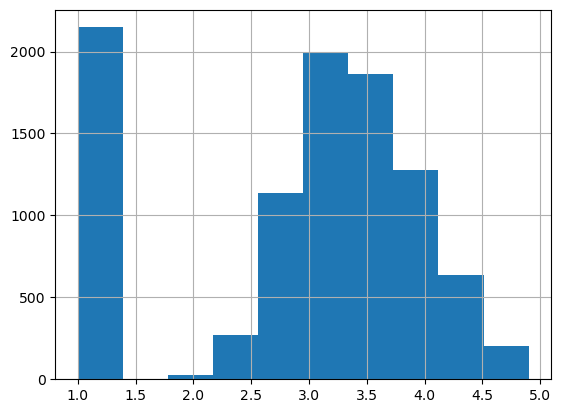

In [5]:
f['Rating'].hist()

In [6]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 15  Price_range          

In [7]:
f.nunique()

RestaurantID            9551
RestaurantName          7446
CountryCode               15
City                     141
Address                 8918
Locality                1208
LocalityVerbose         1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has_Table_booking          2
Has_Online_delivery        2
Is_delivering_now          2
Switch_to_order_menu       1
Price_range                4
Votes                   1012
Average_Cost_for_two     140
Rating                    33
dtype: int64

 Restaurant ID: Qualitative. Rejected.
     
 Restaurant Name: Qualitative. Rejected.
     
 Country Code: Categorical Selected.
     
 City: Categorical. Rejected. Too many unique levels, hence it will cause high dimensionality
 
 Address: Qualitative. Rejected.
     
 Locality: Qualitative. Rejected     
 Locality Verbose: Qualitative. Rejected.
     
 Longitude: Continuous. Selected. This represents the location of estaurant
 
 Latitude: Continuous. Selected. This represents the location of restaurant 
    
 Cuisines: Qualitative. Rejected. A new feature can be engineered from it. 
 
 Currency: Categorical. Selected.
 
 Has Table booking: Categorical. Selected. 
 
 Has Online delivery: Categorical. Selected. 
     
 Is delivering now: Categorical. Selected.
     
 Switch to order menu: Categorical. Selected.
 
 Price range: Categorical. Selected. 
 
Votes: Continuous. Selected.

Average Cost for two: Continuous. Selected.
     
 Rating: Continuous. Selected. This is the Target Variable!

 ## feature enginnering


Some of the columns cannot be used directly for machine learning like Dates, addresses, etc. because these are qualitative in nature. Hence every row has a different string value, Hence the ML algorithms cannot learn anything from them because each row has a different description. In simple terms, no general rules can be created from such columns.
However, we can extract some information from these columns, which can be used in ML. Like from a date column we can take out month, week, quarter etc, which becomes categorical feature.
Similarly we can extract some repetitive information from address like zip codes, locality etc. however if the number of unique values is too high in them (more than 50) then it creates trouble later for the ML algorithm as the data dimensionality increases while converting such columns to dummy variables.
In this data the "Cuisines" column cannot be used directly because it will generate 1825 dummy variables!! Hence, we can count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [8]:

def c_con(ist):
    cu=len(str(ist).split(','))
    return (cu)

In [9]:
f['Cuisinescount']=f['Cuisines'].apply(c_con)
f

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Cuisinescount
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,Turkish Lira(TL),No,No,No,No,3,788,80,4.1,1
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,3,1034,105,4.2,3
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,4,661,170,3.7,2
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,Turkish Lira(TL),No,No,No,No,4,901,120,4.0,1


In [10]:

f.columns

Index(['RestaurantID', 'RestaurantName', 'CountryCode', 'City', 'Address',
       'Locality', 'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Switch_to_order_menu', 'Price_range', 'Votes',
       'Average_Cost_for_two', 'Rating', 'Cuisinescount'],
      dtype='object')

In [11]:
uc=['RestaurantID', 'RestaurantName','City', 'Address',
       'Locality', 'LocalityVerbose','Cuisines']
f=f.drop(uc,axis=1)
f.head()

,CountryCode,Longitude,Latitude,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Cuisinescount
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2



Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
Based on the Basic Data Exploration above, we have spotted seven categorical predictors in the data
Categorical Predictors: 'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Price range'
We use bar charts to see how the data is distributed for these categorical columns.

In [12]:
f.columns 

Index(['CountryCode', 'Longitude', 'Latitude', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Votes', 'Average_Cost_for_two', 'Rating',
       'Cuisinescount'],
      dtype='object')

In [13]:

def PlotBarCharts (inpData, colsToPlot):
    get_ipython().run_line_magic('matplotlib', 'inline')
    
    import matplotlib.pyplot as plt
    
    fig, subplot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5)) 
    fig.suptitle("Bar charts of: "+ str(colsToPlot))
    for colName, plotNumber in zip (colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subplot[plotNumber])

C:\Users\Delip\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
C:\Users\Delip\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


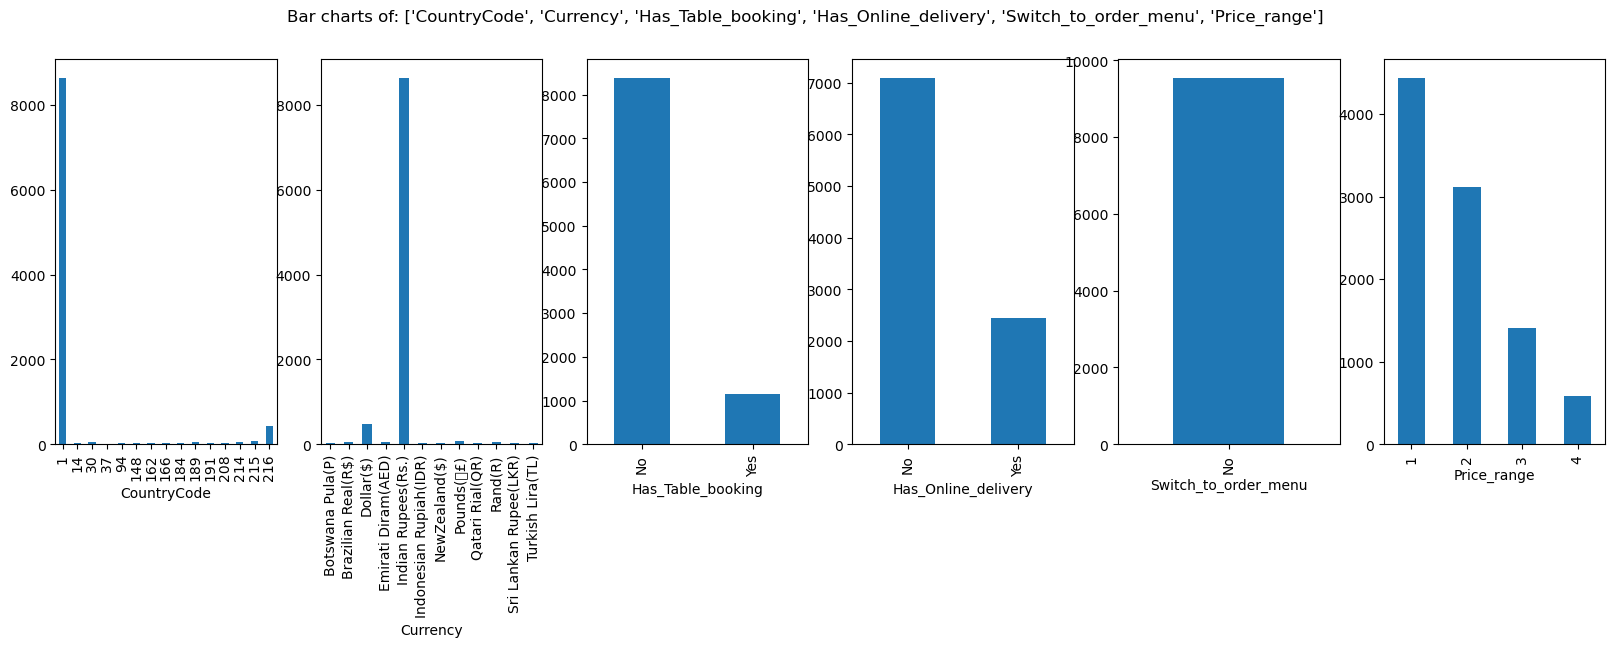

In [14]:

PlotBarCharts(inpData=f,  colsToPlot=["CountryCode","Currency", "Has_Table_booking",
                                     "Has_Online_delivery", "Switch_to_order_menu",
                                     "Price_range"])

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average_Cost_for_two'}>]], dtype=object)

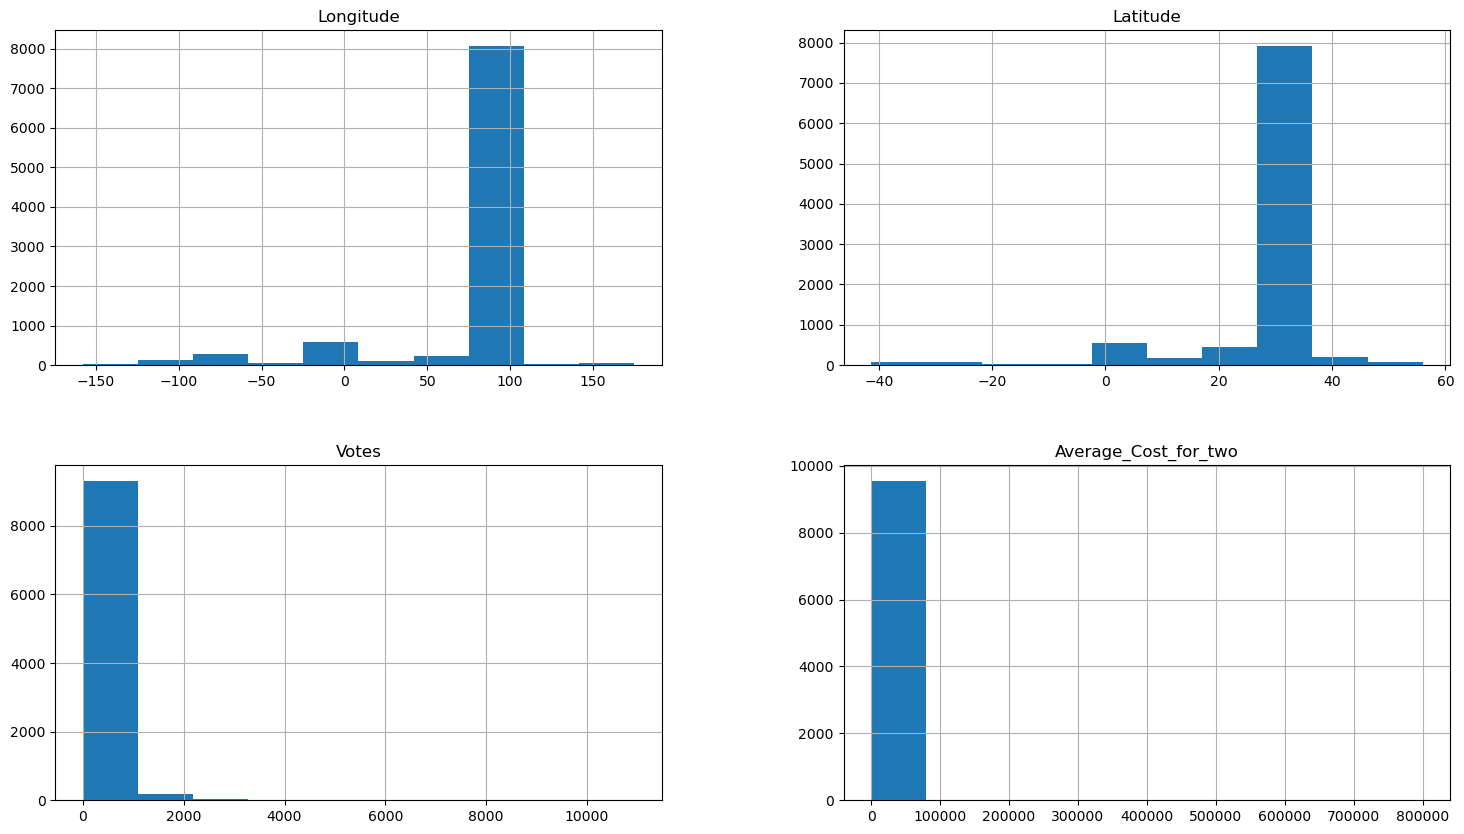

In [15]:

f.hist(['Longitude', 'Latitude', 'Votes',
       'Average_Cost_for_two'],figsize=(18,10))


## Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

### Why I should treat the outliers?
Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

 Option-1: Delete the outlier Records. Only if there are just few rows lost.
 
 Option-2: Impute the outlier values with a logical business value
 
Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Replacing outliers for 'Votes'

In [16]:

f['Votes'][f['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

array([[<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average_Cost_for_two'}>]], dtype=object)

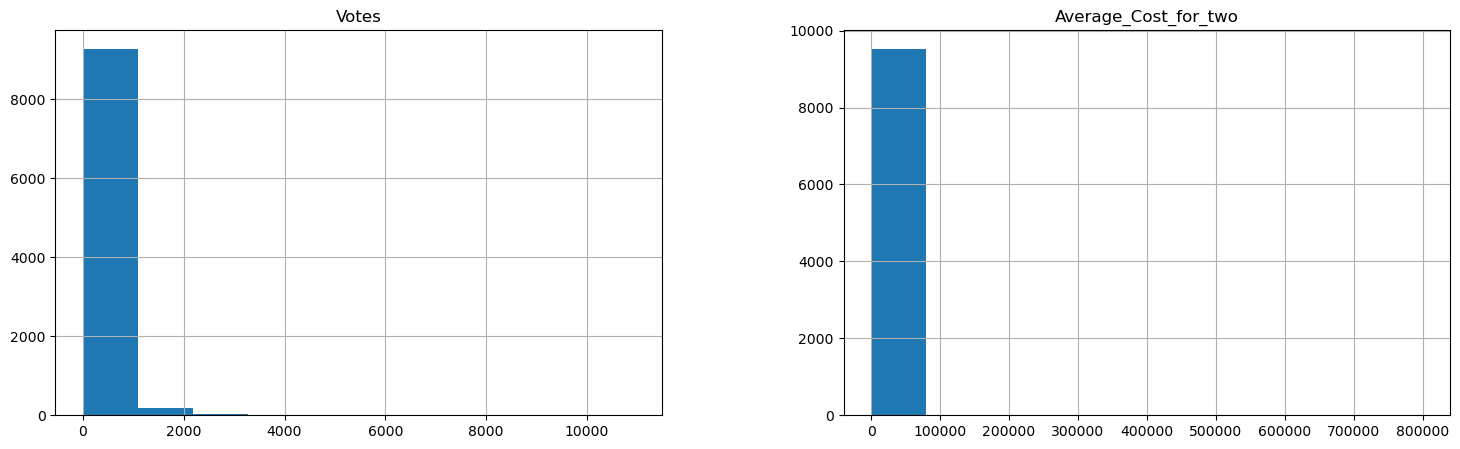

In [17]:
f.hist(['Votes',
       'Average_Cost_for_two'],figsize=(18,5))

In [18]:

f.isnull().sum()

CountryCode             0
Longitude               0
Latitude                0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
Cuisinescount           0
dtype: int64


## Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

### Visual exploration of relationship between variables
 Continuous Vs Continuous---Scatter Plot
 
 Categorical Vs Continuous---Box Plot
 
 Categorical Vs Categorical---- Grouped Bar Plots
 
### Statistical measurement of relationship strength between variables
 Continuous Vs Continuous Correlation matrix
 
 Categorical Vs Continuous--- ANOVA test
 
 Categorical Vs Categorical--- Chi-Square test


In this case study the Target variable is Continuous, hence below two scenarios will be present

Continuous Target Variable Vs Continuous Predictor

Continuous Target Variable Vs Categorical Predictor


## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

In [19]:
cc=['Rating','Longitude','Latitude','Votes','Average_Cost_for_two']
cd=f[cc].corr()
cd

,Rating,Longitude,Latitude,Votes,Average_Cost_for_two
Rating,1.000000,-0.145930,-0.019806,0.349105,0.058957
Longitude,-0.145930,1.000000,0.043207,-0.085101,0.045891
Latitude,-0.019806,0.043207,1.000000,-0.022962,-0.111088
Votes,0.349105,-0.085101,-0.022962,1.000000,0.067783
Average_Cost_for_two,0.058957,0.045891,-0.111088,0.067783,1.000000


In [20]:
cd['Rating'][abs(cd['Rating'])>0.2]

Rating    1.000000
Votes     0.349105
Name: Rating, dtype: float64


## Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

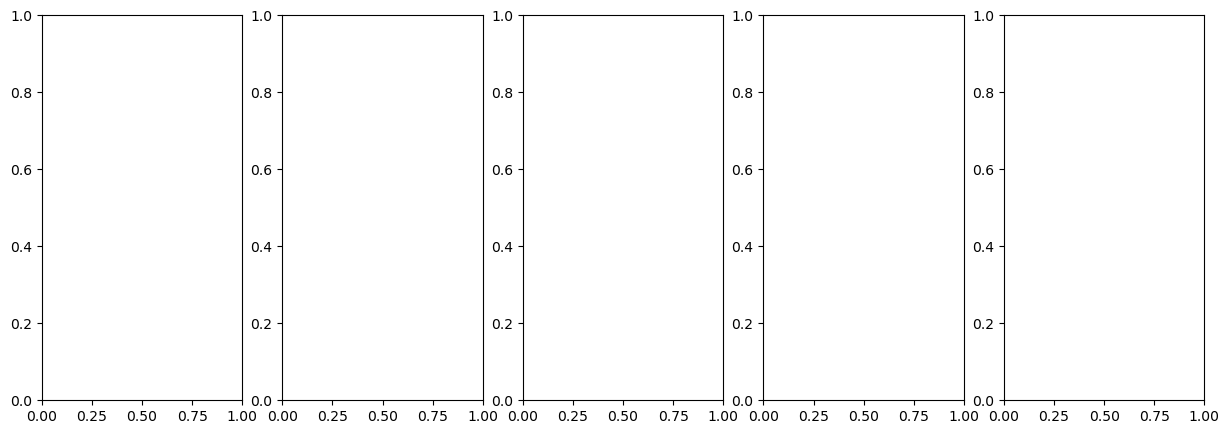

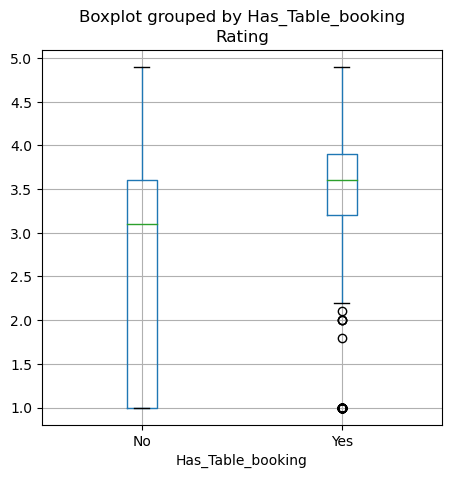

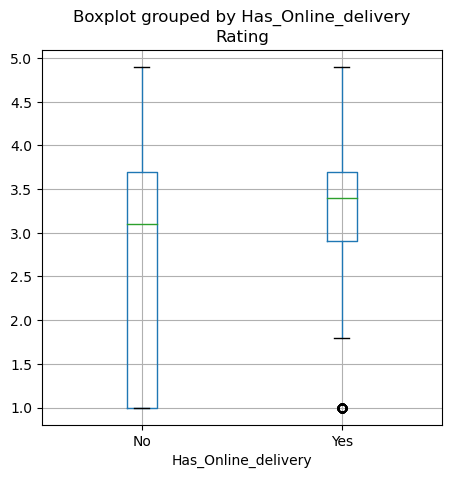

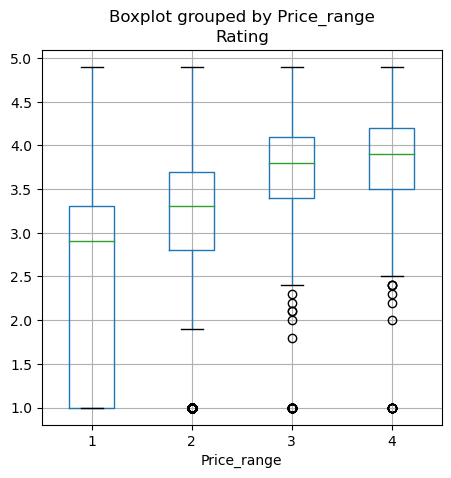

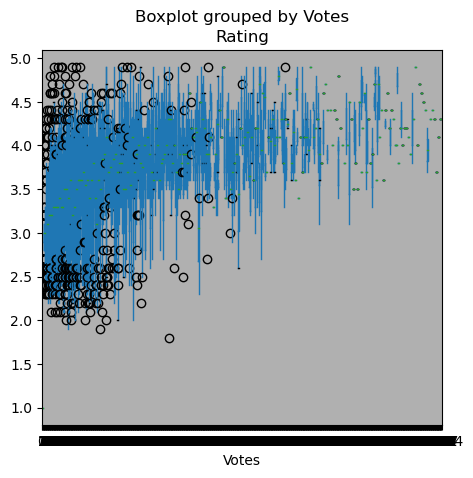

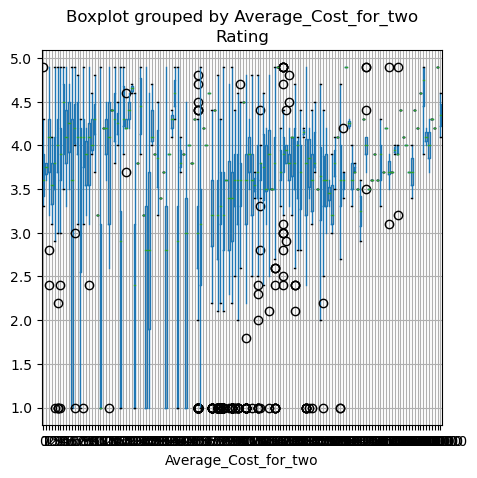

In [21]:
ccl=['Has_Table_booking','Has_Online_delivery','Price_range','Votes','Average_Cost_for_two']
import matplotlib.pyplot as plt
pc=plt.subplots(nrows=1,ncols=len(ccl),figsize=(15,5))
for pt, i in zip(ccl,range(len(ccl))):
    f.boxplot(column='Rating',by=pt,figsize=(5,5),vert=True)


## Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Rating.

In this data, all three categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below


In [22]:

Q1 = np.percentile(f.Rating, 25)
Q3 = np.percentile(f.Rating, 75)
IQR = Q3 - Q1
# Set a threshold for identifying outliers (e.g., values outside [Q1 - 1.5 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = f[(f.Rating < lower_bound) | (f.Rating > upper_bound)]
outliers[['Has_Table_booking','Rating']].head()


,Has_Table_booking,Rating


In [23]:
def fa(inp,tar,cat):
    from scipy.stats import f_oneway
    sp=[]
    print("_____ANOVA RESULTS_____\n")
    for pre in cat:
        cats=inp.groupby(pre)[tar].apply(list)
        ar=f_oneway(*cats)
        if(ar[1]<0.05):
            print(pre,'is correlated with', tar, '|P-Value:',ar[1])
            sp.append(pre)
        else:
            print(pre,'is not corelated with',tar,'|P-Value',ar[1])
    return(sp)

In [24]:
cat=['Has_Table_booking','Has_Online_delivery','Price_range']
fa(inp=f, tar='Rating', cat=cat)

_____ANOVA RESULTS_____

Has_Table_booking is correlated with Rating |P-Value: 3.9393041304297214e-82
Has_Online_delivery is correlated with Rating |P-Value: 1.6952587420575958e-92
Price_range is correlated with Rating |P-Value: 0.0


['Has_Table_booking', 'Has_Online_delivery', 'Price_range']


The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

Final selected Categorical columns:

'Has Table booking', 'Has Online delivery', 'Price range'

In [25]:
selcol=['Votes','Average_Cost_for_two','Has_Table_booking','Has_Online_delivery','Price_range']
dfm=f[selcol]
dfm.head()

,Votes,Average_Cost_for_two,Has_Table_booking,Has_Online_delivery,Price_range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4



## Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning

1. Converting each Ordinal Categorical columns to numeric

2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping

3. Converting all other nominal categorical columns to numeric using pd.get_dummies

4. Data Transformation (Optional):Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

## converting the binary nominal variable to numerical using 1/0 mapping

In [26]:
pd.options.mode.copy_on_write = True 

In [27]:
dfm['Has_Table_booking'].replace({'Yes':1,'No':0},inplace=True)


In [28]:
dfm['Has_Online_delivery'].replace({'Yes':1,'No':0},inplace=True)

In [29]:
dfm_n=pd.get_dummies(dfm)
dfm_n['Rating']=f['Rating']
dfm_n.head()

C:\Users\Delip\AppData\Local\Temp\ipykernel_28248\2057498633.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dfm_n=pd.get_dummies(dfm)
C:\Users\Delip\AppData\Local\Temp\ipykernel_28248\2057498633.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dfm_n=pd.get_dummies(dfm)


,Votes,Average_Cost_for_two,Price_range,Has_Table_booking_0,Has_Table_booking_1,Has_Online_delivery_0,Has_Online_delivery_1,Rating
0,314,1100,3,0,1,1,0,4.8
1,591,1200,3,0,1,1,0,4.5
2,270,4000,4,0,1,1,0,4.4
3,365,1500,4,1,0,1,0,4.9
4,229,1500,4,0,1,1,0,4.8



## Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [30]:
dfm_n.columns

Index(['Votes', 'Average_Cost_for_two', 'Price_range', 'Has_Table_booking_0',
       'Has_Table_booking_1', 'Has_Online_delivery_0', 'Has_Online_delivery_1',
       'Rating'],
      dtype='object')

In [31]:
tv='Rating'
prec=['Votes','Average_Cost_for_two','Has_Table_booking_0','Has_Online_delivery_0','Price_range']

x=dfm_n[prec].values
y=dfm_n[tv].values

from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.3,random_state=42)


## Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [32]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
prs=MinMaxScaler()
prsf=prs.fit(x)
x=prsf.transform(x)

from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
print(x_tr.shape)
print(y_tr.shape)
print(x_te.shape)
print(y_te.shape)


(6685, 5)
(6685,)
(2866, 5)
(2866,)


# Multiple linear regression



In [34]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

vm = LinearRegression()  # Use "=" instead of "-" for assignment
print(vm)

lreg = vm.fit(x_tr,y_tr)

prediction = lreg.predict(x_te)  # Use "=" instead of "-" for assignment

from sklearn import metrics

print('R2 value:', metrics.r2_score(y_tr, lreg.predict(x_tr)))  # Added underscore between "x" and "tr"

print("\n model validation and accuracy calculation")

tdr = pd.DataFrame(data=x_te, columns=prec)  # Use "=" instead of "-" for assignment

tdr[tv] = y_te
tdr['pre'+tv] = np.round(prediction)  # Corrected the concatenation syntax

print(tdr[[tv, 'pre'+tv]].head())  # Corrected the concatenation syntax

tdr['APE'] = 100 * (abs(tdr['Rating'] - tdr['preRating'])) / len(tdr)  # Corrected the variable name
mape = np.mean(tdr['APE'])
mmape = np.median(tdr['APE'])

a = 100 - mape
ma = 100 - mmape

print('maot d:',a)
def acc_sc(orig,pre):
    mape=np.mean(100*(np.abs(orig-pre)/orig))
    return(100-mape)

from sklearn.metrics import make_scorer
c_sco=make_scorer(acc_sc,greater_is_better=True)

from sklearn.model_selection import cross_val_score
acc_va=cross_val_score(vm,x,y,cv=10,scoring=c_sco)
print('\n final average accuracy of the model:',round(acc_va.mean(),2))



LinearRegression()
R2 value: 0.2937985497684332

 model validation and accuracy calculation
   Rating  preRating
0     2.1        2.0
1     4.1        3.0
2     3.2        3.0
3     4.4        3.0
4     3.5        2.0
maot d: 99.97085326485801

 final average accuracy of the model: 51.24


In [35]:





from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import pandas as pd
import numpy as np
# Initialize Decision Tree classifier
model = RandomForestRegressor(n_estimators=100, random_state=42)
odel = KNeighborsRegressor()
r_model = Ridge(alpha=1.0) 
l_model = Lasso(alpha=0.1)



# Initialize KNN classifier

# Fit the model to the training data
odel.fit(x_tr,y_tr)


KNeighborsRegressor()

In [36]:
y_pred =odel.predict(x_te)


In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_te, y_pred)
print("Mean Squared Error:", mse)
from sklearn import metrics

print('r2 value',metrics.r2_score(y_tr,odel.predict(x_tr)))



Mean Squared Error: 0.1444272156315422
r2 value 0.9278883319092457


# Decision trees

In [38]:
from sklearn.tree import DecisionTreeRegressor
rm=DecisionTreeRegressor(random_state=42) #max_depth=6

print(rm)

dt=rm.fit(x_tr,y_tr)
prediction=dt.predict(x_te)


from sklearn import metrics

print('r2 value',metrics.r2_score(y_tr,dt.predict(x_tr)))

%matplotlib inline


print("\n_____model valu and accu cali___")

tdr['APE'] = 100 * (abs(tdr['Rating'] - tdr['preRating'])) / len(tdr)  # Corrected the variable name
mape = np.mean(tdr['APE'])
mmape = np.median(tdr['APE'])

a = 100 - mape
ma = 100 - mmape

print('maot d:',a)
print('me a o t d:',ma)
def acc_sc(orig,pre):
    mape=np.mean(100*(np.abs(orig-pre)/orig))
    return(100-mape)

from sklearn.metrics import make_scorer
c_sco=make_scorer(acc_sc,greater_is_better=True)

from sklearn.model_selection import cross_val_score
acc_va=cross_val_score(rm,x,y,cv=10,scoring=c_sco)
print('\n accuracy values for 10-fold cross validation:\n',acc_va)
print('\n final average accuracy of the model:',round(acc_va.mean(),2))



DecisionTreeRegressor(random_state=42)
r2 value 0.9862073025142123

_____model valu and accu cali___
maot d: 99.97085326485801
me a o t d: 99.96859734822051

 accuracy values for 10-fold cross validation:
 [88.87931046 90.63867553 90.32746164 90.71588661 90.80913246 93.99874363
 91.96649644 92.28981802 91.65113815 90.48460339]

 final average accuracy of the model: 91.18



I am choosing Decision Trees as the final model since it is very fast for this data!

In order to deploy the model we follow below steps

1. Train the model using 100% data available

2. Save the model as a serialized file which can be stored anywhere

3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

# Choosing only the most important variables

Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'Votes', 'Average Cost for two', 'Price range'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [39]:
tv='Rating'

pre=['Votes','Average_Cost_for_two','Price_range','Has_Table_booking_0','Has_Online_delivery_0']
x=dfm_n[pre].values
y=dfm_n[tv].values

from sklearn.preprocessing import StandardScaler,MinMaxScaler
prs=MinMaxScaler()
prsf=prs.fit(x)
x=prsf.transform(x)
print(x.shape)
print(y.shape)



(9551, 5)
(9551,)


In [40]:
y=dfm_n['Rating']
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Rating, Length: 9551, dtype: float64

In [41]:
x=dfm_n[['Votes','Average_Cost_for_two','Price_range','Has_Table_booking_0','Has_Online_delivery_0']]
x

,Votes,Average_Cost_for_two,Price_range,Has_Table_booking_0,Has_Online_delivery_0
0,314,1100,3,0,1
1,591,1200,3,0,1
2,270,4000,4,0,1
3,365,1500,4,1,1
4,229,1500,4,0,1
...,...,...,...,...,...
9546,788,80,3,1,1
9547,1034,105,3,1,1
9548,661,170,4,1,1
9549,901,120,4,1,1


In [42]:
Votes=6
Average_Cost_for_two=55
Price_range=2
Has_Table_booking_0=0
Has_Online_delivery_0=0

y_p=odel.predict([[Votes,Average_Cost_for_two,Price_range,Has_Table_booking_0,Has_Online_delivery_0]])
print(f"Predicted Value:", y_p)





Predicted Value: [4.36]


In [43]:
import pickle

pickle.dump(odel, open("Diabetes.sav", "wb"))

In [44]:
model = pickle.load(open("Diabetes.sav", "rb"))
Votes=52
Average_Cost_for_two=200
Price_range=2
Has_Table_booking_0=0
Has_Online_delivery_0=0


y_p=odel.predict([[Votes,Average_Cost_for_two,Price_range,Has_Table_booking_0,Has_Online_delivery_0]])
print(f"Predicted Value:", y_p)


Predicted Value: [4.36]


In [ ]:
!streamlit run scan.py